In [1]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm

## Data Wrangling (same as previous step)

In [2]:
from utils import data_prep

In [3]:
df_delta_cmb = data_prep('spy', 'bnd')

Earliest possible date is 2007-04-10.


In [4]:
df_delta_cmb.head()

date,delta_a,delta_b,price_a,price_b
date,f64,f64,f64,f64
2007-04-11,0.995921,0.997341,0.995921,0.997341
2007-04-12,1.004443,0.999867,1.000346,0.997209
2007-04-13,1.004563,0.9984,1.00491,0.995614
2007-04-16,1.009496,1.000934,1.014453,0.996544
2007-04-17,1.002658,1.002535,1.01715,0.99907


## HMM

In [5]:
series_for_hmm = df_delta_cmb.select(('delta_a', 'delta_b')).to_numpy()

In [6]:
series_for_hmm.shape

(4406, 2)

In [7]:
length = len(series_for_hmm)

In [8]:
from utils import pick_hmm

In [9]:
list_n_state = [2, 3, 4, 5, 6, 7]
dict_hmm = pick_hmm(list_n_state, series_for_hmm, length)

Model is not converging.  Current: 33934.237385264234 is not greater than 33935.90514338482. Delta is -1.6677581205876777
Model is not converging.  Current: 33575.79438352058 is not greater than 33587.50147397208. Delta is -11.707090451498516
Model is not converging.  Current: 32401.720861974 is not greater than 32422.38642132108. Delta is -20.66555934707867
Model is not converging.  Current: 33224.95958320388 is not greater than 33253.337501619266. Delta is -28.377918415382737
Model is not converging.  Current: 32918.65317314777 is not greater than 32936.365669578845. Delta is -17.712496431071486
Model is not converging.  Current: 32865.52747167137 is not greater than 32918.31626995046. Delta is -52.78879827909259


Gaussian Hidden Markov Models are trained and evaluated.


Model is not converging.  Current: 34230.09249889196 is not greater than 34232.977488132274. Delta is -2.8849892403159174
Model is not converging.  Current: 34211.82962472192 is not greater than 34258.90262399598. Delta is -47.07299927405984
Model is not converging.  Current: 34299.734739226435 is not greater than 34314.40604934562. Delta is -14.671310119185364
Model is not converging.  Current: 34090.48687638199 is not greater than 34100.725525933456. Delta is -10.238649551465642
Model is not converging.  Current: 34004.239804615754 is not greater than 34075.31163944633. Delta is -71.07183483057452
Model is not converging.  Current: 34295.421855538625 is not greater than 34583.298117390965. Delta is -287.87626185233967


Gaussian Mixture Hidden Markov Models are trained and evaluated.


In [10]:
from utils import show_result

In [11]:
df_training_result = show_result(dict_hmm, list_n_state)

In [12]:
df_training_result.sort(by='bic', descending=False).head(6)

model,n_state,score,aic,bic
str,i64,f64,f64,f64
"""GaussianMixtureModelHMM""",2,34207.417853,-68392.835706,-68322.537759
"""GaussianMixtureModelHMM""",4,34271.190967,-68480.381934,-68282.269536
"""GaussianMixtureModelHMM""",3,34167.327169,-68294.654338,-68166.839887
"""GaussianHMM""",2,33932.632837,-67843.265674,-67772.967726
"""GaussianMixtureModelHMM""",5,34020.907738,-67953.815475,-67672.623684
"""GaussianMixtureModelHMM""",7,34147.582962,-68143.165924,-67657.471012


In [13]:
hmm_use = hmm.GaussianHMM(n_components=2, n_iter=2000, random_state=918).fit(series_for_hmm, length)

Model is not converging.  Current: 33934.237385264234 is not greater than 33935.90514338482. Delta is -1.6677581205876777


In [14]:
from utils import simulate_performance

In [15]:
dict_sim = simulate_performance(hmm_use, n_step=500, n_sim=100)

In [16]:
from utils import rebalance

In [17]:
dict_sim_result = rebalance(dict_sim, n_step=500, n_sim=100)

In [20]:
result_df = pl.concat([dict_sim_result[f'sim_{i}']['df_amount'] for i in range(100)])

In [21]:
result_df.head()

step,amount,sim_i
u32,f64,i64
0,1.0,0
1,1.001004,0
2,1.009475,0
3,1.018902,0
4,1.044565,0


<Axes: xlabel='step', ylabel='amount'>

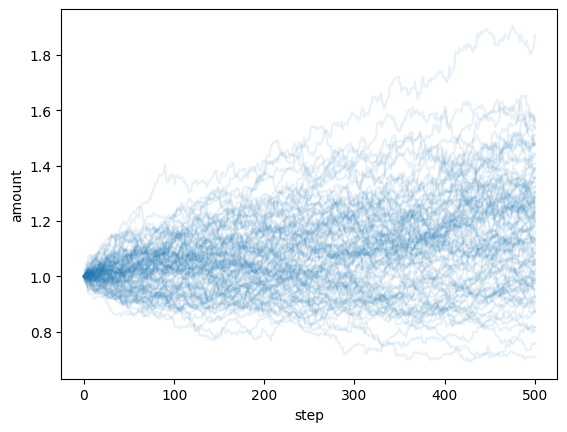

In [22]:
sns.lineplot(
    data=result_df, x='step', y='amount', units='sim_i', estimator=None, alpha = 0.1
)

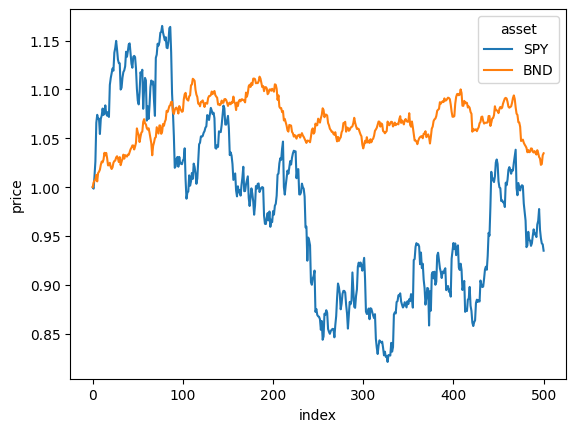

In [24]:
from utils import plot_single_sim
plot_single_sim(0, dict_sim, 500, asset_a='SPY', asset_b='BND')

## Final output

In [26]:
last_step = result_df.filter(pl.col('step') == 500).get_column('amount').to_list()

<Axes: ylabel='Count'>

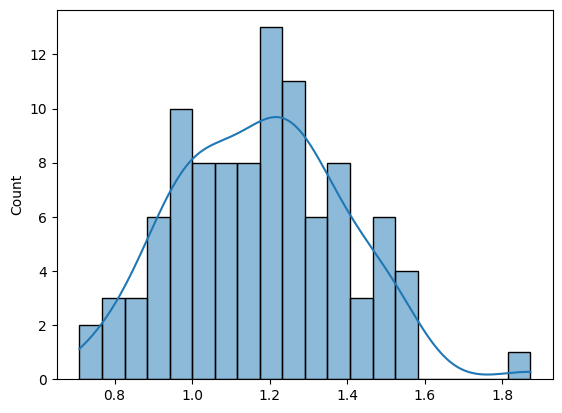

In [27]:
sns.histplot(last_step, kde=True, bins=20)

In [28]:
print('Best 1% performance: ', f'{(np.percentile(last_step, 99) - 1) * 100:.2f}%')
print('Best 10% performance: ', f'{(np.percentile(last_step, 90) - 1) * 100:.2f}%')
print('Median performance: ', f'{(np.percentile(last_step, 50) - 1) * 100:.2f}%')
print('Worst 10% performance: ', f'{(np.percentile(last_step, 10) - 1) * 100:.2f}%')
print('Worst 1% performance: ', f'{(np.percentile(last_step, 1) - 1) * 100:.2f}%')

Best 1% performance:  56.79%
Best 10% performance:  47.33%
Median performance:  19.17%
Worst 10% performance:  -8.01%
Worst 1% performance:  -24.36%
